<a href="https://colab.research.google.com/github/tbeucler/2024_MLEES_Ebook/blob/main/Haokun/gnn_knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Graph Neural Networks



**Learning objectives:**

1. Define a Graph Neural Network (GNN)
2. Understand the steps and best practices to design and train GNNs
3. Distinguish GNNs from other types of NNs
4. Discuss the main applications of GNNs


**What are Graph Neural Networks (GNNs)?**

As a class of artificial neural networks, graph neural networks apply the predictive power of deep learning to rich data structures that depict objects and their relationships as points connected by lines in a graph. For instance in below figure, a CNN layer can be considered a GNN applied to graphs whose nodes are pixels and only adjacent pixels are connected by edges in the graph.



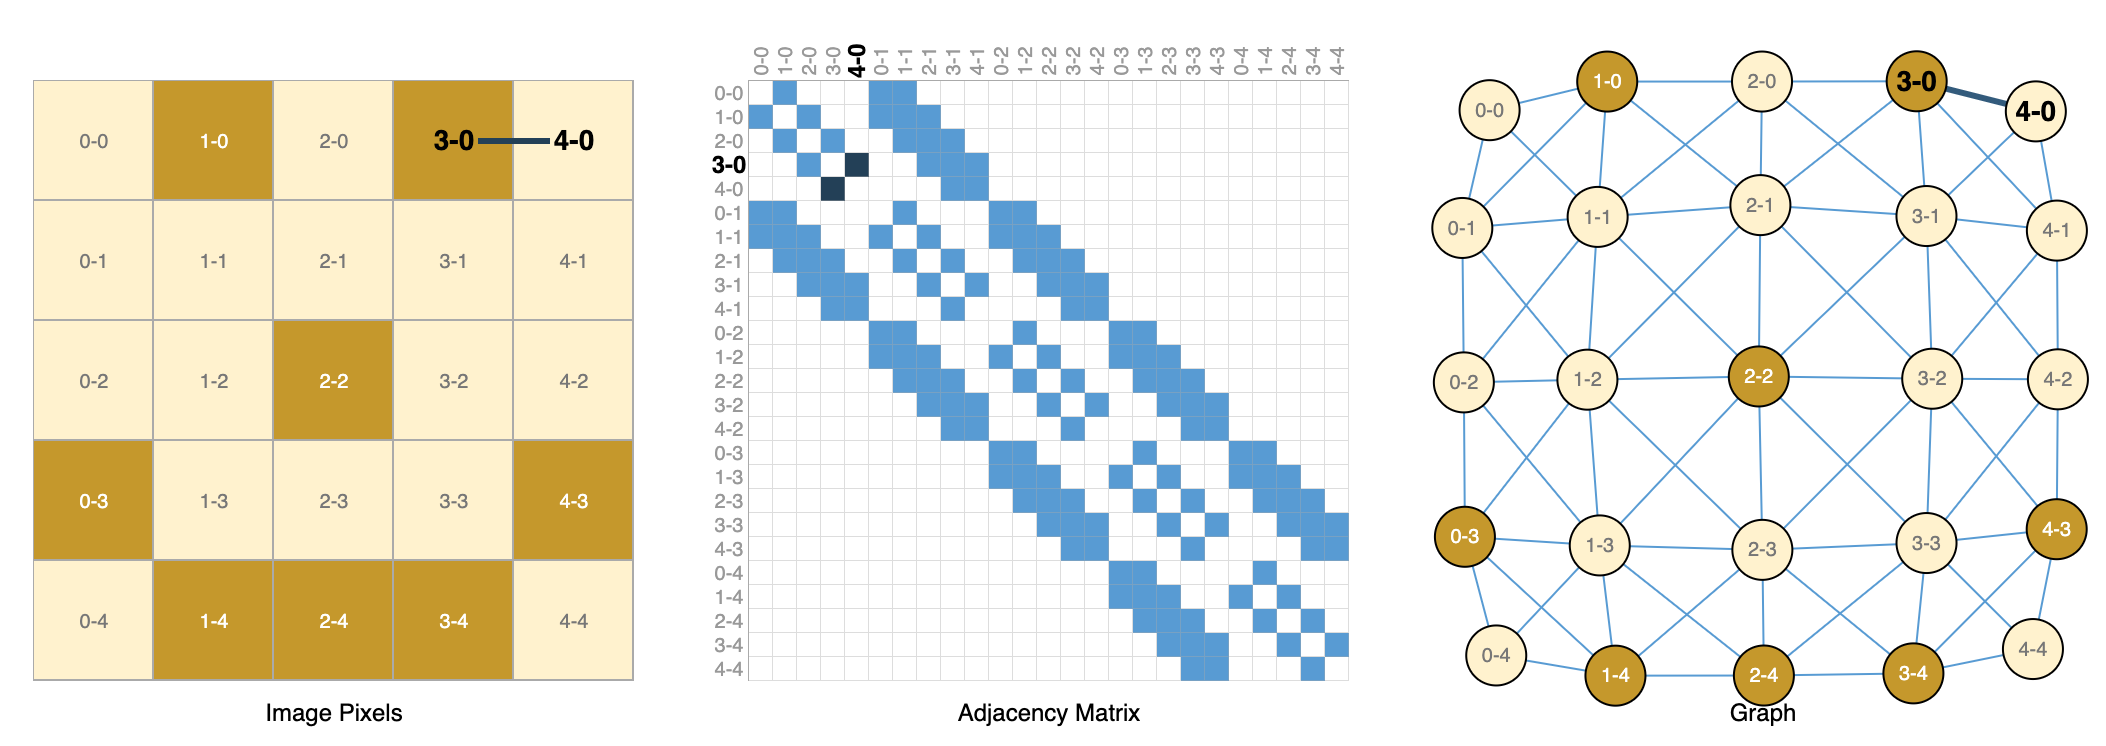





In Graph Neural Networks (GNNs), data points are referred to as nodes, which are connected by edges (lines). The mathematical representation of nodes and edges enables GNNs to effectively capture the complex structural information inherent in graph-structured data. This structural information often includes dependencies, connections, and contextual relationships.

However, GNNs have some fundamental limitations:

1.  They are typically constrained to operate on a fixed number of nodes.
2.  Their time and space complexities are relatively high.
3.  They have limited capabilities for effectively handling the edges of graphs.

**Key components of GNNs**



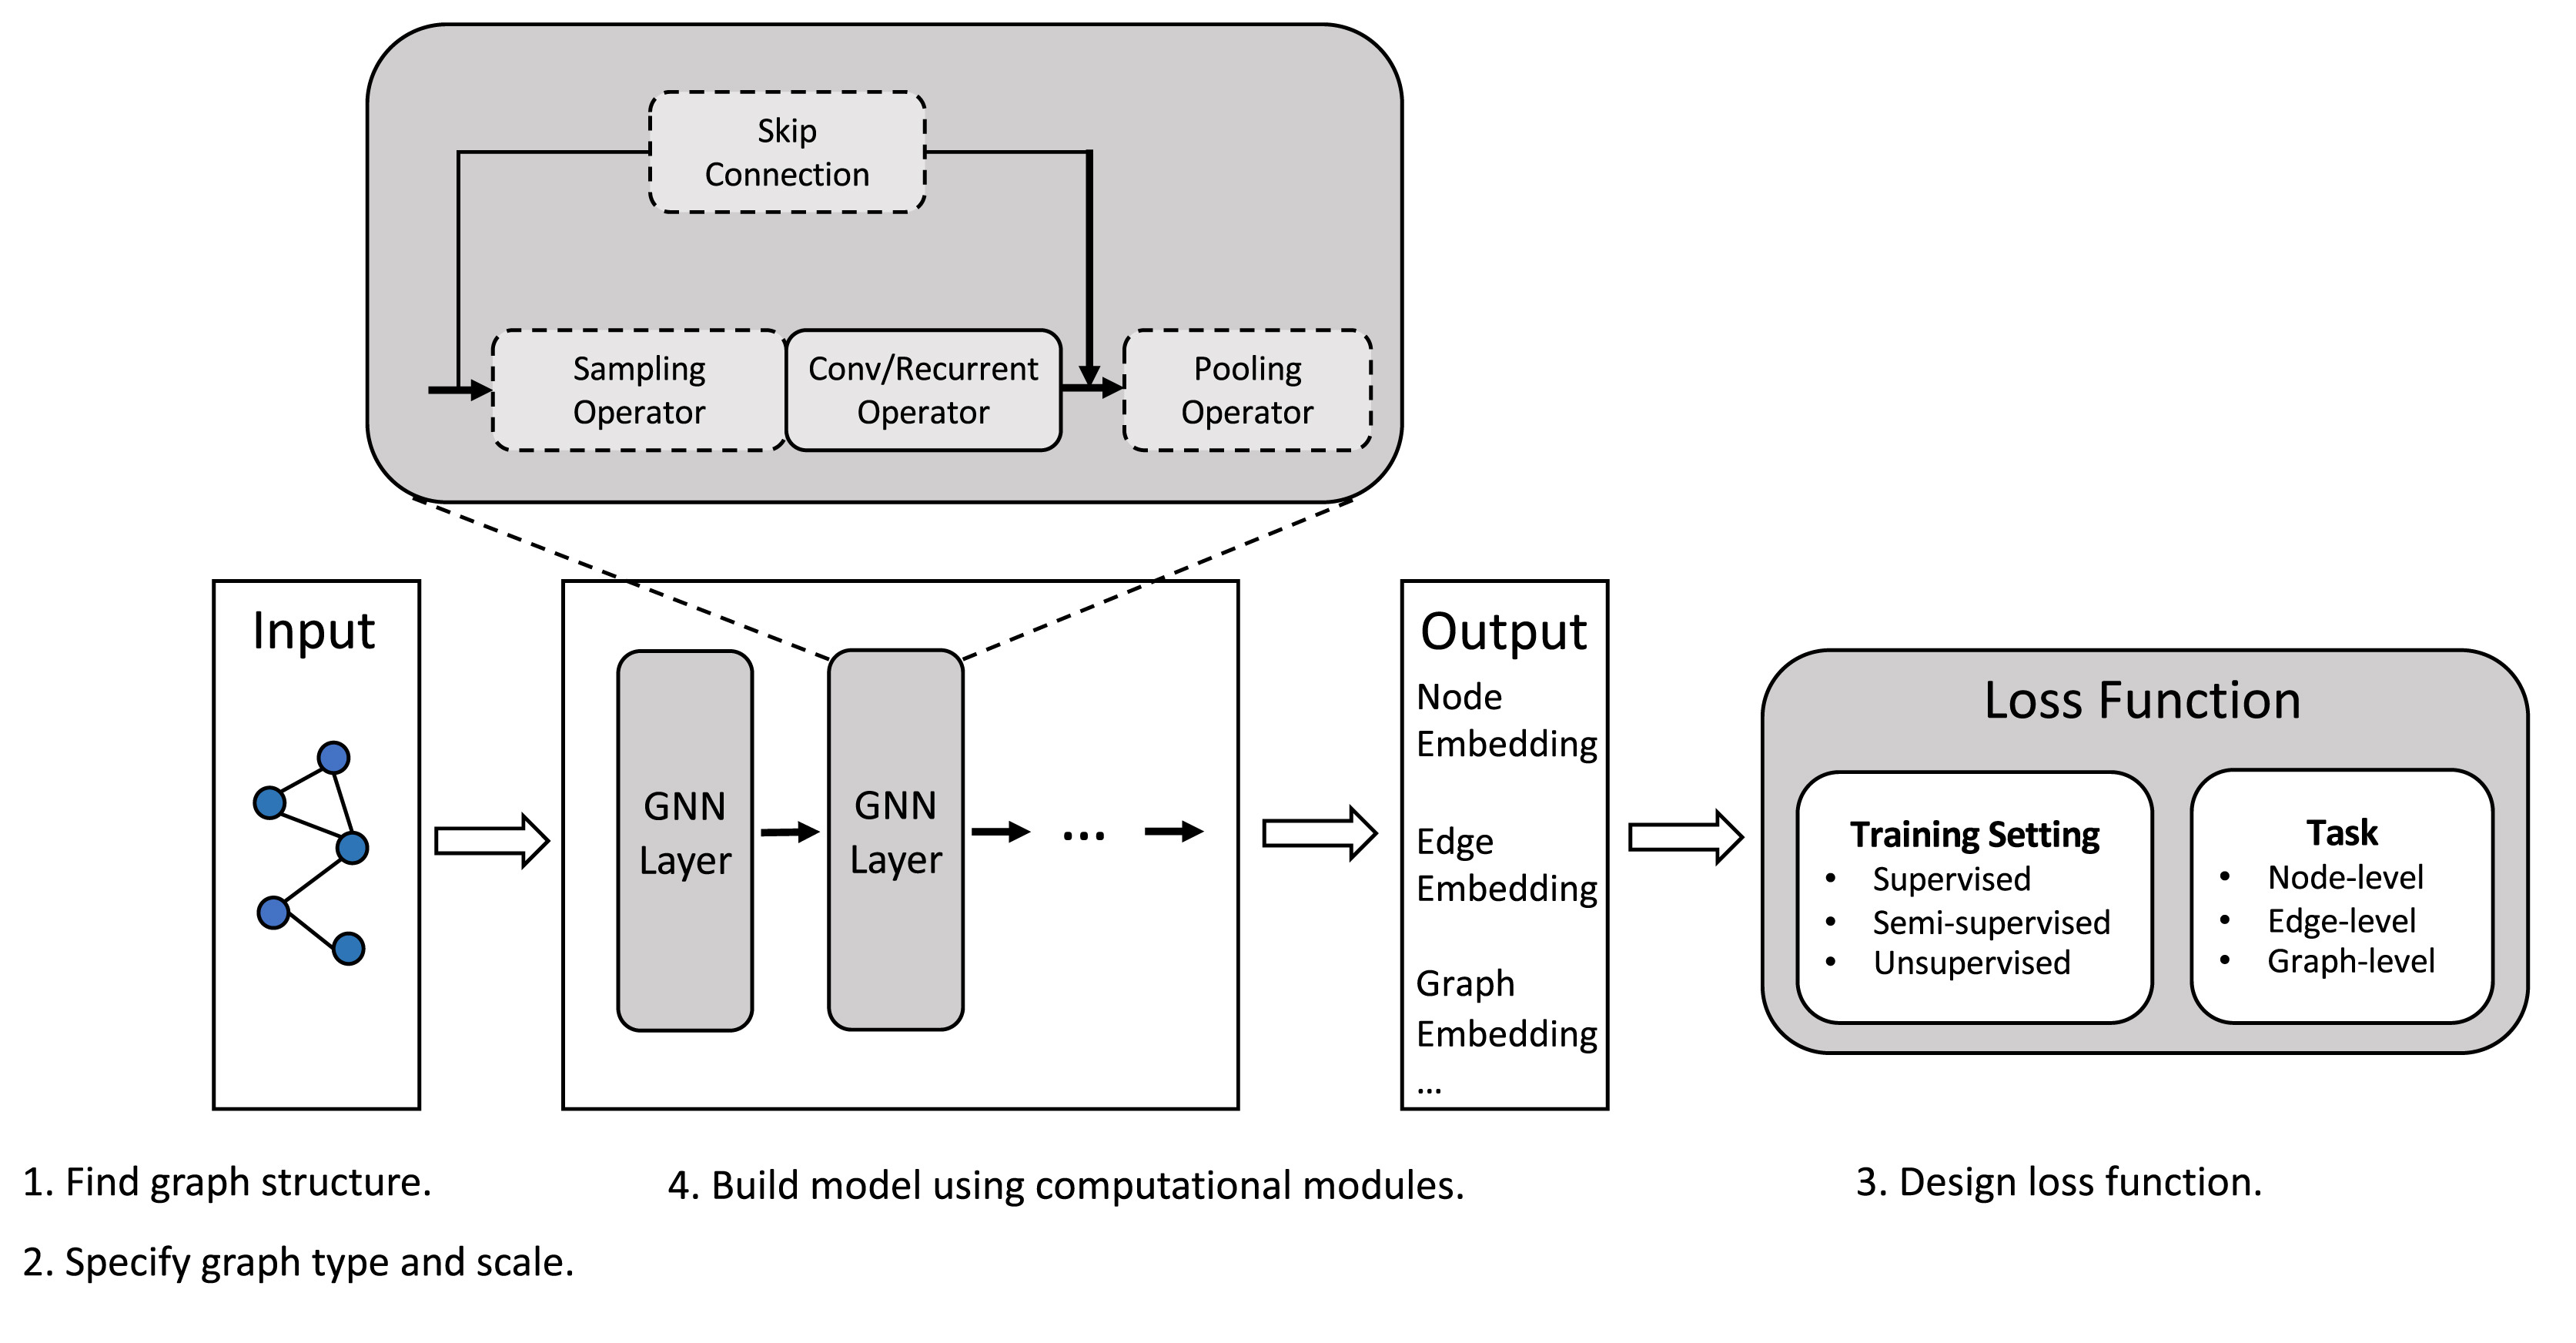

(1) Find graph structure:

At first, we have to find out the graph structure in the application. There are usually two scenarios: structural scenarios and non-structural scenarios.

- In **structural scenarios**, the graph structure is explicit in the applications, such as applications on molecules, physical systems, knowledge graphs and so on.
- In **non-structural scenarios**, graphs are implicit so that we have to first build the graph from the task, such as building a fully-connected “word” graph for text or building a scene graph for an image. After we get the graph, the later design process attempts to find an optimal GNN model on this specific graph.

(2) Specify graph type and scale:

Graphs with complex types could provide more information on nodes and their connections. Graphs are usually categorized as:

- **Directed/Undirected Graphs.** Edges in directed graphs are all directed from one node to another, which provide more information than undirected graphs.
- **Homogeneous/Heterogeneous Graphs.** Nodes and edges in homogeneous graphs have same types, while nodes and edges have different types and should be further considered in heterogeneous graphs.
- **Static/Dynamic Graphs.** When input features or the topology of the graph vary with time, the graph is regarded as a dynamic graph. The time information should be carefully considered in dynamic graphs.

Note these categories are orthogonal, which means these types can be combined, e.g. one can deal with a dynamic directed heterogeneous graph. Once we specify the graph type, the additional information provided by these graph types should be further considered in the design process.

As for the graph scale, there is no clear classification criterion for “small” and “large” graphs. The criterion is still changing with the development of computation devices (e.g. the speed and memory of GPUs). If the adjacency matrix of a graph (the space complexity is $\cal{O}$($n^2$)) cannot be stored and processed by the device, then we regard the graph as a large-scale graph and consider some sampling methods.

(3) Design loss function:

In this step we should design the loss function based on our task type and the training setting. For graph learning tasks, there are usually three kinds of tasks:

- **Node-level** tasks focus on nodes, which include node classification, node regression, etc. Node classification tries to categorize nodes into several classes, and node regression predicts a continuous value for each node. Node clustering aims to partition the nodes into several disjoint groups, where similar nodes should be in the same group.
- **Edge-level** tasks are edge classification and link prediction, which require the model to classify edge types or predict whether there is an edge existing between two given nodes.
- **Graph-level** tasks include graph classification, graph regression, and graph matching, all of which need the model to learn graph representations.

From the perspective of supervision, we can also categorize graph learning tasks into three different training settings:

-  **Supervised setting** provides labeled data for training.
-  **Semi-supervised setting** gives a small amount of labeled nodes and a large amount of unlabelled nodes for training. In the test phase, the **transductive setting** requires the model to predict the labels of the given unlabelled nodes, while the **inductive setting** provides new unlabelled nodes from the same distribution to infer. Most node and edge classification tasks are semi-supervised.
- **Unsupervised setting** only offers unlabelled data for the model to find patterns. Node clustering is a typical unsupervised learning task.

With the task type and the training setting, we can design a specific loss function for the task. For example, for a node-level semi-supervised classification task, the cross-entropy loss can be used for the labeled nodes in the training set.

(4) Build model using computational modules:

Finally, we can start building the model using the computational modules. Some commonly used computational modules are:

- **Propagation Module.** The propagation module is used to propagate information between nodes so that the aggregated information could capture both feature and topological information. In propagation modules, the **convolution operator** and recurrent operator are usually used to aggregate information from neighbors while the **skip connection** operation is used to gather information from historical representations of nodes and mitigate the over-smoothing problem.
- **Sampling Module.** When graphs are large, sampling modules are usually needed to conduct propagation on graphs. The sampling module is usually combined with the propagation module.
- **Pooling Module.** When we need the representations of high-level subgraphs or graphs, pooling modules are needed to extract information from nodes.

With these computation modules, a typical GNN model is usually built by combining them. A typical architecture of the GNN model is illustrated in the middle part of figure where the convolutional operator, recurrent operator, sampling module and skip connection are used to propagate information in each layer and then the pooling module is added to extract high-level information.

**GNN Architecture**


*   **Graph Convolution Network (GCN)**: GCN is a specific type of GNN that uses convolutional operations to propagate information between nodes in a graph. GCNs leverage a localized aggregation of neighboring node features to update the representations of the nodes. GCNs are based on the convolutional operation commonly used in image processing, adapted to the graph domain. The layers in a GCN typically apply a graph convolution operation followed by non-linear activation functions.

*   **Graph Attention Networks (GAT)**: GAT is a specific type of GNN architecture that incorporates attention mechanisms to capture important relationships between nodes in a graph. The key idea behind GAT is to assign attention weights to the neighboring nodes of a target node, allowing the network to focus on the most relevant neighbors during the information propagation process. By assigning different attention weights to different neighbors, GAT can selectively attend to important nodes and aggregate information effectively.

*   **GraphSAGE**: GraphSAGE is an inductive algorithm for computing node embeddings. GraphSAGE is using node feature information to generate node embeddings on unseen nodes or graphs. Instead of training individual embeddings for each node, the algorithm learns a function that generates embeddings by sampling and aggregating features from a node’s local neighborhood.

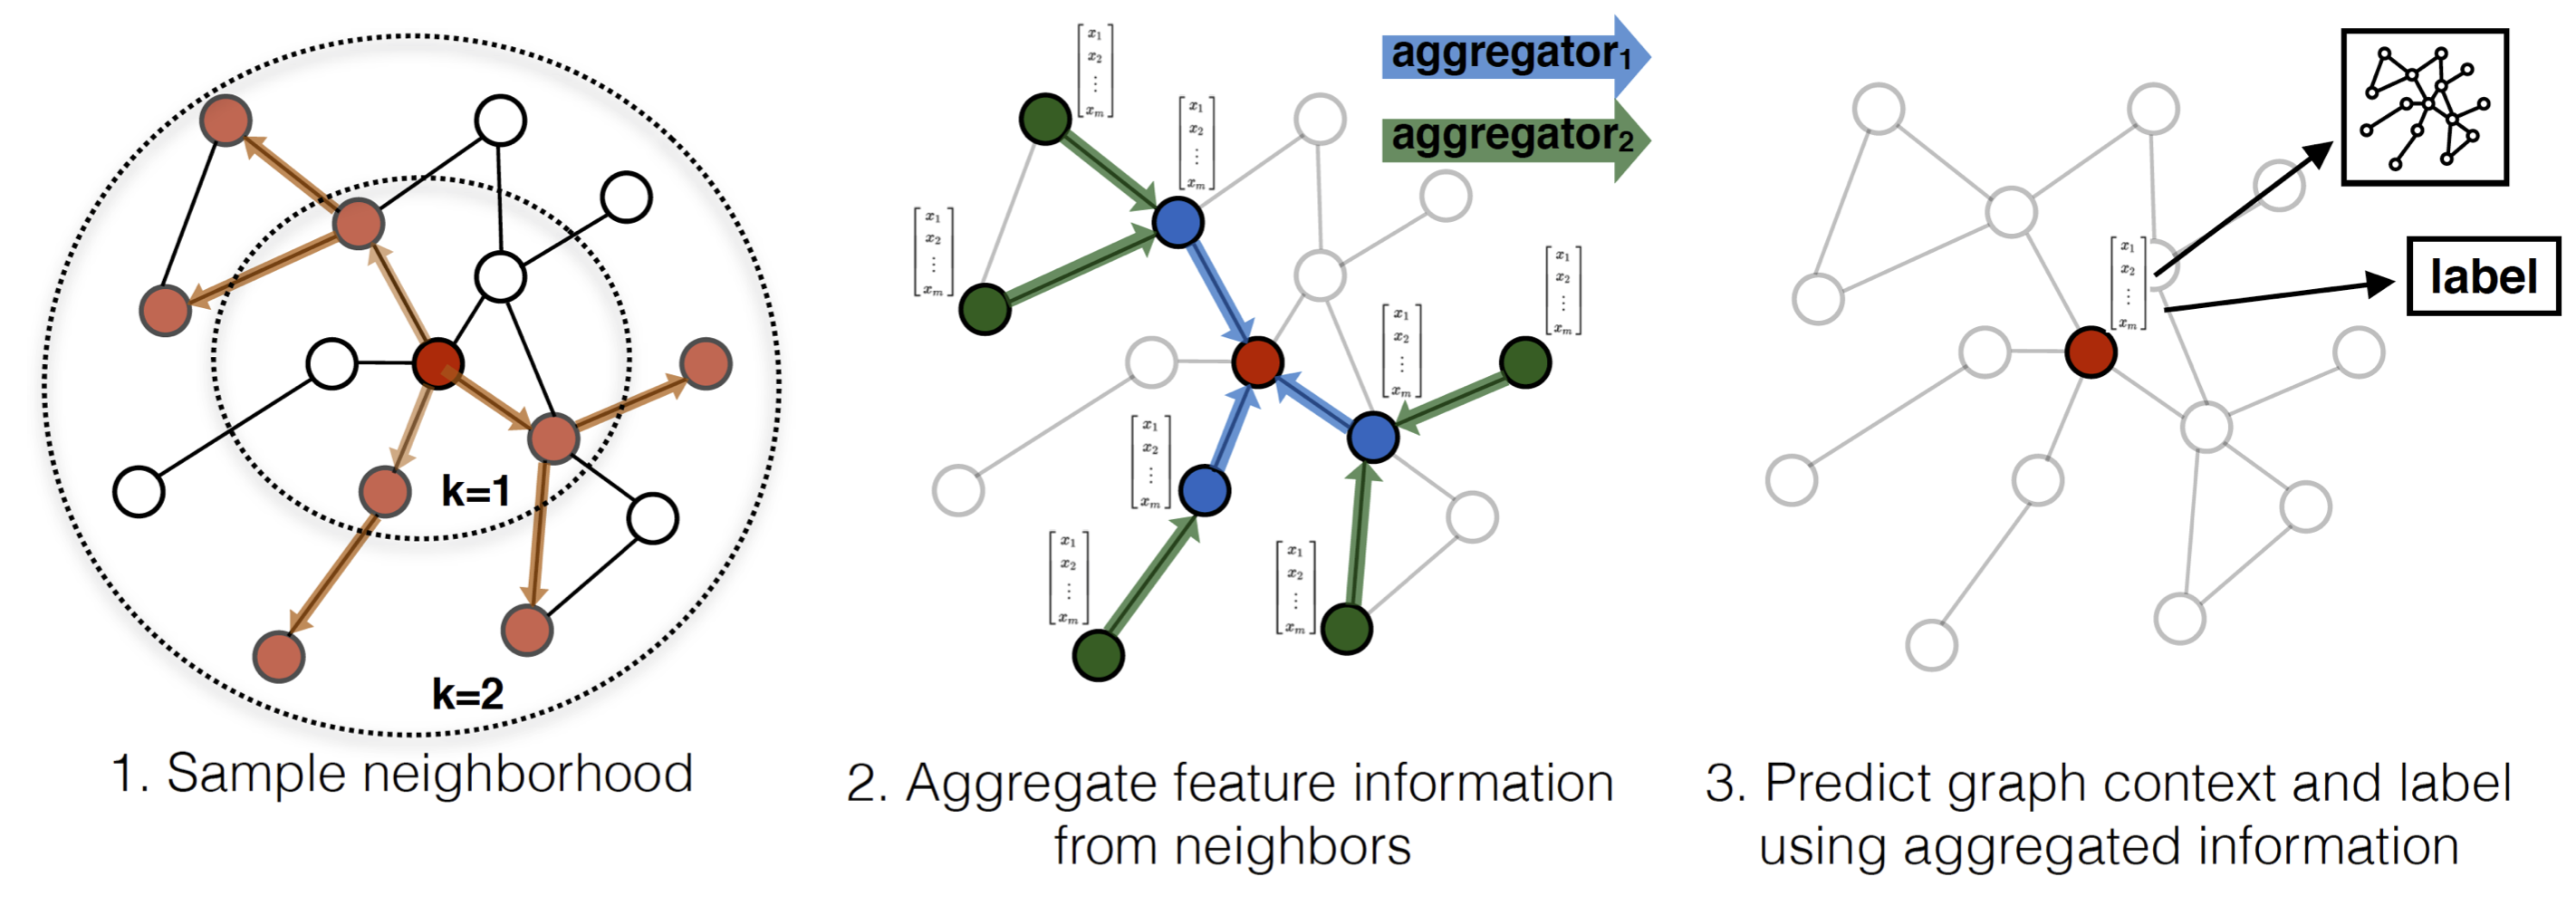


**GNN applications**

1. **Natural Language Processing:** GNNs can be used to model the relationships between words or sentences in documents, allowing for improved document classification, information retrieval, and generating coherent and contextually relevant text.

2. **Question Answering:** GNNs can help in question-answering tasks by representing the relationships between question words and candidate answers within a knowledge graph.

3. **Image Segmentation:** GNNs can be employed for pixel-level image segmentation tasks by modeling relationships between adjacent pixels as a graph.

4. **Genomic Sequence Analysis:** GNNs can model relationships between genes or genetic sequences, helping in gene expression prediction and sequence classification tasks.

5. **Drug Discovery:** GNNs can be used for drug-target interaction prediction and molecular property prediction, which is vital in pharmaceutical research.

6. **Transportation:** GNNs can develop more accurate models for traffic forecasting, demand prediction, and safety analysis. Additionally, GNNs can help optimize the decision-making processes for autonomous vehicles, intersection management, and urban planning, ultimately leading to more efficient, sustainable, and user-friendly transportation systems for everyone.